# ES 335 Prerequisite Test : Machine Learning

Details: Aryan Solanki (23110049) - BTech 2023, Artificial Intelligence 

## Essential Libraries

In [130]:
import pandas as pd
import numpy as np
import time
import random

## Question 1 
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.
## Solution 

Let us assume two matrices, A of size (n,k) and B of size (k,m).

### Multiplication 

Let (n,k,m) = (3,2,4)

**Matrix A**
|   |   |
|---|---|
| x1 | x2 |
| y1 | y2 |
| z1 | z2 |


**Matrix B**
|   |   |   |   |
|---|---|---|---|
| a1 | a2 | a3 | a4 |
| b1 | b2 | b3 | b4 |

So, if I perform Matrix multiplication of A and B, I can break it down in the form of multiple dot products of two vectors.

=> Example: Row 1 of the multiplied matrix will be : 

    [x1.a1 + x2.b1 , x1.a2 + x2.b1, x1.a3 + x2.b3, x1.a4 +x2.b4 ]

Here, I can see, that for the first row, I need to perform **m×k** multiplications. Where m indicates the columns, k indicates the row of matrix B. Or more simply, I can see 4 small units (denoted by m) and each unit having 2 multiplications inside of it (denoted by k). Hence total multiplications of a single row are m×k. 

Furthermore, there are n such rows (3 in our case), 

So, final answer => **n×m×k**

### Addition 

Similiarly, if we build upon from our previous example. 

If I go on to build the first row of my multiplied matrix, I can see again, that there are 4 small units (cells denoted by m) and each cell has 1 addition only (denoted by (k-1)). So for a single row, the total number of additions are **m×(k-1)**.

Furthermore, there are n such rows. 

So, final answer => **n×m×(k-1)**

## Question 2
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

## Solution 

Based on certain experimentations with the proposed question, I noticed that the time difference for smaller matrices, is approximately 0.5 to 1s. However, as we increase the size of the matrices, we can see a significant differnce between the time taken by both methods.

**Numpy is clearly faster.**

### parameters

In [131]:
# we could increase them so as see the difference between np and lists for larger matrices. 

n = 10
k = 8
m = 20

#this is the limit of the numbers(integers) that are being assigned in our matrices
limit = 5


### list function 

In [132]:
#list 
def list_time():
    start_time = time.time()

    list_1 = []
    for i in range(n):
        temp_list=[]
        for j in range(k):
            temp_list.append(random.randint(0,limit))

        list_1.append(temp_list)
        
    # print(len(list_1),len(list_1[0])) [can be used to check dimension]
    # print(list_1) [used to see contents of list one]

    list_2 = []
    for i in range(k):
        temp_list=[]
        for j in range(m):
            temp_list.append(random.randint(0,limit))

        list_2.append(temp_list)

    # print(len(list_2),len(list_2[0])) [can be used to check dimension]
    # print(list_2) [used to see contents of list two]

    #transpose of list 2 [essential to perform matrix multiplication in code]
    #* unpacks 2D matrix into row blocks -> zip takes multiple iterables and then we perform list comprehension
    list_2_trans=[list(i) for i in zip(*list_2)]

    ans_list=[]
    for i in range(n):
        temp_list=[]
        for j in range(m):
            prod = 0
            for index in range(len(list_1[i])):
                prod+=list_1[i][index]*list_2_trans[j][index]
            
            temp_list.append(prod)
        ans_list.append(temp_list)

    # print(ans_list)

    end_time = time.time()

    return float(end_time-start_time)

### numpy function 

In [133]:
#numpy 
def numpy_time():
    start_time = time.time()

    a1 = np.random.randint(limit, size=(n,k))
    a2 = np.random.randint(limit, size=(k,m))

    ans = np.dot(a1,a2)

    # print(ans)

    end_time = time.time()

    return float(end_time-start_time)

### comparison

In [134]:
np_time = []
lst_time = []
for _ in range(100):
    np_time.append(numpy_time())
    lst_time.append(list_time())

print("We ran 100 iterations, with fixed parameters, and then on average we are checking what is faster:")

print("Numpy Average time for parameters {}, {}, {}".format(n,k,m))
print(np.mean(np_time))


print("Lists Average time for parameters {}, {}, {}".format(n,k,m))
print(np.mean(lst_time))

We ran 100 iterations, with fixed parameters, and then on average we are checking what is faster:
Numpy Average time for parameters 10, 8, 20
0.00016968727111816407
Lists Average time for parameters 10, 8, 20
0.0003909039497375488


### Reasoning 

There are multiple reasons as to why np is faster than lists, few are as follows (explained in a simple sense):
1. **Numpy Library is written in C.** The fundamental nature of C allows it to be faster than the same code written in python, as is the case of lists. 
2. **Numpy uses parallelism.** It is the ability to breakdown a given computational task, into smaller sub tasks, so that they can be carried out(allocated) on different processors for execution. 

## Question 3 
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

## Solution 

### Original Method
Let the size of the array be n. 

So, Expense of every pass = O(n)

Since I require x number of passes to find the xth highest element of the array, so if x = median of the array: then number of that pass would be proportional to n/2 (if even) or floor(n/2) (if odd).

Therefore the overall Time complexity = O(n×n/2) => **O($n^2$)**

(This could be loosely defined as insertion sort)

### Better Method 

**Method**: sort the array, and then locate the middle element (median). 

**Note:**

if I have a sorted array, with indexing starting at zero, then:

If n = even, 

    Median = (arr[n/2 - 1] + arr[n/2])/2

If n = odd, 

    Median =  arr[floor(n/2)] 

Expense of locating an element based on index = constant time = O(1). 

Therefore, The overall time complexity => 

[Time complexity of sorting]+[Time complexity of locating]

Answer => O(n×logn) + O(1) = **O(n×log(n))**

(the best method however, would be Quickselect, where I would get O(n))

In [135]:
# building a 1D array
# for simplicity, let us assume n = odd always. 

n = 21
a = np.random.randint(100, size = (n))
print(a)
print(np.median(a))

[ 0 43 57 97 28 51 15 62 40 10 10 97 20 94 64 48 42 26 12  7 51]
42.0


In [136]:
# original method (insertion sort)

def og_method(arra):

    for i in range(1, len(arra)):

        key = arra[i]
        j = i-1

        while j >= 0 and key < arra[j] :
                arra[j + 1] = arra[j]
                j -= 1
        arra[j + 1] = key    
    
    return arra[int(len(arra)/2)] 

print(og_method(a))

42


In [137]:
# better method 
# using inbuilt sort 

def better_method(arr):
    return sorted(arr)[int(len(arr)/2)]

print(better_method(a))

42


In [138]:
#comparing time 

#defining 

n = 5001
time_og = []
time_better = []
time_np = []

for i in range(5):
    a = np.random.randint(100, size = (n))
    #one
    start = time.time()
    median_1 = og_method(a)
    end = time.time()
    time_og.append(1000*(end-start))
    # print("Time taken for original method (ms):" + str(1000*(end-start)))

    #two
    start = time.time()
    median_2 = og_method(a)
    end = time.time()
    time_better.append(1000*(end-start))
    # print("Time taken for better method (ms):" + str(1000*(end-start)))

    #three
    start = time.time()
    median_3 = np.median(a)
    end = time.time()
    time_np.append(1000*(end-start))
    # print("Time taken for numpy routine method (ms):" + str(1000*(end-start)))

print("The average time taken for 1D array of length {} in ms is: ".format(n))
print("Original Method : "+ str(np.mean(time_og)))
print("Better Method : "+ str(np.mean(time_better)))
print("Numpy Routine Method : "+ str(np.mean(time_np)))

The average time taken for 1D array of length 5001 in ms is: 
Original Method : 2450.1358032226562
Better Method : 0.0
Numpy Routine Method : 0.0


### Conclusion 

The numpy.median routine is much faster than the other two implementations. 

## Question 4 
What is the gradient of the following function with respect to x and y?

$$
f(x,y) = (x^2)y + y^3\sin(x)
$$

## Solution


### Gradient wrt x
$$
\frac{\partial f}{\partial x} = 2xy + (y^3)\cos(x)
$$

### Gradient wrt y
$$
\frac{\partial f}{\partial y} = x^2 + 3 y^2 \sin(x)
$$

## Question 5 

Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

## Solution

In [139]:
import jax.numpy as jnp
from jax import grad

In [140]:
def fn (x,y):
    return (x*x)*y +(y*y*y)*jnp.sin(x)

def f_x(x):
    return 2*x*y + (y**3)*np.cos(x)

def f_y(y):
    return x**2 + 3*(y**2)*np.sin(x)

for i in range(4):
    x,y = random.randint(0,100),random.randint(0,100)

    xx, yy = grad(fn, argnums=(0, 1))(float(x), float(y))

    print(f"Explicit Gradient Function wrt x: {f_x(x):.2f}")
    print(f"Explicit Gradient Function wrt x: {f_y(y):.2f}")
    print("JAX Gradient Function wrt x: ", xx)
    print("JAX Gradient Function wrt y: ", yy)
    print("\n")


Explicit Gradient Function wrt x: -177.84
Explicit Gradient Function wrt x: 24.24
JAX Gradient Function wrt x:  -177.83838
JAX Gradient Function wrt y:  24.24096


Explicit Gradient Function wrt x: -744417.64
Explicit Gradient Function wrt x: 7662.84
JAX Gradient Function wrt x:  -744417.7
JAX Gradient Function wrt y:  7662.84


Explicit Gradient Function wrt x: -151003.70
Explicit Gradient Function wrt x: 37555.13
JAX Gradient Function wrt x:  -151003.69
JAX Gradient Function wrt y:  37555.133


Explicit Gradient Function wrt x: 326526.70
Explicit Gradient Function wrt x: -4975.16
JAX Gradient Function wrt x:  326526.7
JAX Gradient Function wrt y:  -4975.161




## Question 6 
Use sympy to confirm that you obtain the same gradient analytically.

## Solution

In [141]:
import sympy as sy

In [142]:
x,y = sy.symbols('x y')

func = (x*x)*y +(y*y*y)*sy.sin(x)

In [143]:
print("Partial differentiation wrt x: ")
sy.diff(func,x)

Partial differentiation wrt x: 


2*x*y + y**3*cos(x)

In [144]:
print("Partial differentiation wrt y: ")
sy.diff(func,y)

Partial differentiation wrt y: 


x**2 + 3*y**2*sin(x)

## Question 7 

Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
    2. Branch 2
2. 2023
    1. Branch 1
    2. Branch 2
3. 2024
    1. Branch 1
    2. Branch 2
4. 2025
    1. Branch 1
    2. Branch 2

## Solution

In [145]:
dict = {
    "2022": {
        "Branch 1" : { 
                        "Roll Number = 1 and Name = N"
                        : {"Math":100,"English":70},
                        "Roll Number = 2 and Name = M"
                        : {"Math":90,"English":78}
                     },
        "Branch 2" : {}

            },
   "2023": {
       "Branch 1" : {},
       "Branch 2" : {}
   },
   "2024": {
       "Branch 1" : {},
       "Branch 2" : {}
   },
   "2025": {
       "Branch 1" : {},
       "Branch 2" : {}
   }
}

## Question 8 
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

## Solution

In [146]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __str__(self):
        return f"Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __str__(self):
        students_str = ", ".join(str(student) for student in self.students)
        return f"Branch: {self.name}, Students: [{students_str}]"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = {}

    def add_branch(self, branch):
        self.branches[branch.name] = branch

    def __str__(self):
        branches_str = ", ".join(str(branch) for branch in self.branches.values())
        return f"Year: {self.year}, Branches: [{branches_str}]"

class Database:
    def __init__(self):
        self.years = {}

    def add_year(self, year):
        self.years[year.year] = year

    def __str__(self):
        years_str = ", ".join(str(year) for year in self.years.values())
        return f"Database: [{years_str}]"

#db object of Database class
database = Database()

#years object of years class 
year_2022 = Year(2022)
year_2023 = Year(2023)
year_2024 = Year(2024)
year_2025 = Year(2025)

#branches object of branch class
branch1_2022 = Branch("Branch 1")
branch2_2022 = Branch("Branch 2")

#student objects of student class
student1 = Student(1, "N", {"Math": 100, "English": 70})
student2 = Student(2, "M", {"Math": 90, "English": 78})

branch1_2022.add_student(student1)
branch1_2022.add_student(student2)

#branch object passed to year object
year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)

#year object passed to database object
database.add_year(year_2022)
database.add_year(year_2023)
database.add_year(year_2024)
database.add_year(year_2025)

print(database)


Database: [Year: 2022, Branches: [Branch: Branch 1, Students: [Roll Number: 1, Name: N, Marks: {'Math': 100, 'English': 70}, Roll Number: 2, Name: M, Marks: {'Math': 90, 'English': 78}], Branch: Branch 2, Students: []], Year: 2023, Branches: [], Year: 2024, Branches: [], Year: 2025, Branches: []]


## Question 9 

Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $y = x$
2. $y = x^2$
3. $y = \frac{x^3}{100}$
4. $y = \sin(x)$
5. $y = \frac{\sin(x)}{x}$
6. $y = \log(x)$
7. $y = e^x$

## Solution

In [147]:
import matplotlib.pyplot as plt

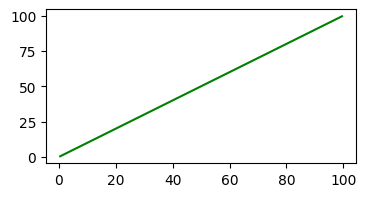

In [148]:
x = np.arange(0.5,100,0.5)
plt_ = plt.figure(figsize=(4, 2))
plt.plot(x,x,color='green')
plt.show()

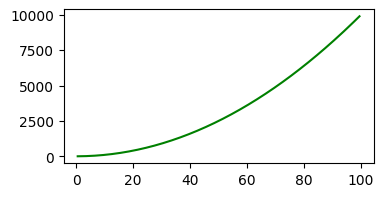

In [149]:
plt_ = plt.figure(figsize=(4, 2))
plt.plot(x,x**2,color='green')
plt.show()

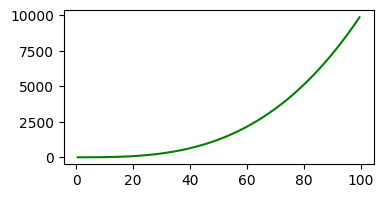

In [150]:
plt_ = plt.figure(figsize=(4, 2))
plt.plot(x,x**3/100,color='green')
plt.show()

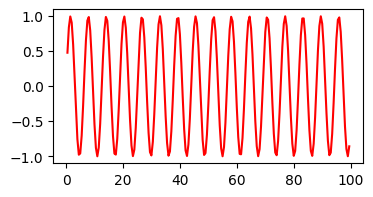

In [151]:
plt_ = plt.figure(figsize=(4, 2))
plt.plot(x,np.sin(x),color='red')
plt.show()

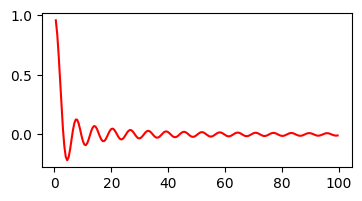

In [152]:
plt_ = plt.figure(figsize=(4, 2))
plt.plot(x,np.sin(x)/x,color='red')
plt.show()

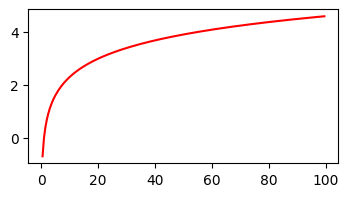

In [153]:
plt_ = plt.figure(figsize=(4, 2))
plt.plot(x,np.log(x),color='red')
plt.show()

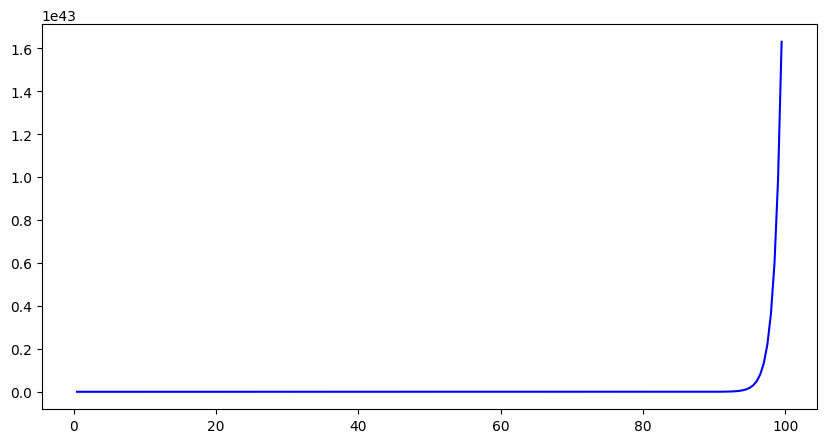

In [154]:
plt_ = plt.figure(figsize=(10, 5))
plt.plot(x,np.exp(x),color='blue')
plt.show()
#the scale of y axis gives a correct sense of the graph's nature 

## Question 10
Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.
## solution


In [155]:
cols = ['a','b','c','d','e']
array = np.random.rand(20,5)+1
array[:4]

array([[1.06584948, 1.94022584, 1.34509134, 1.1612339 , 1.41648531],
       [1.6792049 , 1.98130038, 1.12232387, 1.66563092, 1.76147272],
       [1.9946071 , 1.10688055, 1.17393547, 1.62618171, 1.51123382],
       [1.10526205, 1.86697145, 1.28937366, 1.30892912, 1.17664063]])

In [156]:
df = pd.DataFrame(array,columns= cols)
df.head()

,a,b,c,d,e
0,1.065849,1.940226,1.345091,1.161234,1.416485
1,1.679205,1.981300,1.122324,1.665631,1.761473
2,1.994607,1.106881,1.173935,1.626182,1.511234
3,1.105262,1.866971,1.289374,1.308929,1.176641
4,1.984123,1.970174,1.462121,1.406217,1.530495


Std deviation formula: 
$s = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2}$


In [157]:
df["mean"] = df.loc[:,cols].mean(axis=1)
df.head()

,a,b,c,d,e,mean
0,1.065849,1.940226,1.345091,1.161234,1.416485,1.385777
1,1.679205,1.981300,1.122324,1.665631,1.761473,1.641987
2,1.994607,1.106881,1.173935,1.626182,1.511234,1.482568
3,1.105262,1.866971,1.289374,1.308929,1.176641,1.349435
4,1.984123,1.970174,1.462121,1.406217,1.530495,1.670626


In [158]:
index_std_highest = 0 #column
index_mean_lowest = 0 #row 

std_list = list(df.std(axis=0)[:-1]) # excluding the column containing mean
max_std = 0 
for i in range(len(cols)):
    if std_list[i]>std_list[index_std_highest]:
        index_std_highest = i

print("the column with the highest std is: ")
print(cols[index_std_highest])

min_mean=0
for i in range(df.shape[0]):
    if df.iloc[i,5]<df.iloc[index_mean_lowest,5]:
        index_mean_lowest = i


print("\nthe row with the lowest mean is : ")
print(df.iloc[index_mean_lowest,:])
print("index:"+str(index_mean_lowest))

the column with the highest std is: 
a

the row with the lowest mean is : 
a       1.052506
b       1.317179
c       1.504343
d       1.340918
e       1.347476
mean    1.312485
Name: 15, dtype: float64
index:15


## Question 11

Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

## Solution

In [159]:
df["f"] = df[cols].sum(axis=1)
df.head()

,a,b,c,d,e,mean,f
0,1.065849,1.940226,1.345091,1.161234,1.416485,1.385777,6.928886
1,1.679205,1.981300,1.122324,1.665631,1.761473,1.641987,8.209933
2,1.994607,1.106881,1.173935,1.626182,1.511234,1.482568,7.412839
3,1.105262,1.866971,1.289374,1.308929,1.176641,1.349435,6.747177
4,1.984123,1.970174,1.462121,1.406217,1.530495,1.670626,8.353129


In [160]:
def g_allocate(x):
    if x < 8:
        return "LT8"
    else:
        return "GT8"

df["g"] = df["f"].apply(g_allocate)
df.head()

,a,b,c,d,e,mean,f,g
0,1.065849,1.940226,1.345091,1.161234,1.416485,1.385777,6.928886,LT8
1,1.679205,1.981300,1.122324,1.665631,1.761473,1.641987,8.209933,GT8
2,1.994607,1.106881,1.173935,1.626182,1.511234,1.482568,7.412839,LT8
3,1.105262,1.866971,1.289374,1.308929,1.176641,1.349435,6.747177,LT8
4,1.984123,1.970174,1.462121,1.406217,1.530495,1.670626,8.353129,GT8


In [161]:
df_LT8 = df[df["g"]=="LT8"]
df_GT8 = df[df["g"]=="GT8"]

print("\nthe standard deviation of column f for g = LT8 is: ")
print(df_LT8["f"].std())
print("\nthe standard deviation of column f for g = GT8 is: ")
print(df_GT8["f"].std())


the standard deviation of column f for g = LT8 is: 
0.4146654319131745

the standard deviation of column f for g = GT8 is: 
0.07165175270931194


## Question 12 

Write a small piece of code to explain broadcasting in numpy.

## Solution

In a very crude sense, broadcasting is the innate ability of the numpy library to be able to accomodate mathematical (generally matrix) calculations/computations, of variables/arrays that are of different dimensions. A very simple example could be the addition of a matrix to a scalar. 

In genral, we know Numpy arrays are more efficient than for loops, this is attributed to vectorization.  One such functionality/feature that aids it is broadcasting. 

In [162]:
arr = np.random.randint(10,size=(3,4)) #10 indicates the upper bound, 0 is the lower bound
#we have defined a 3*4 matrix with integers. 
arr

array([[6, 8, 3, 8],
       [0, 1, 8, 1],
       [7, 3, 2, 0]])

In [163]:
#let us define a scalar with a value
b = 2

In a mathematical sense, if I were to add this scalar to every element of the matrix, I would have to build a (3,4) sized matrix (the same size as that of the original array), and then add it. However, with Numpy, I need not scale, and I could directly add it to the matrix. Numpy implicilty scales the scalar to the approriate dimension of the matrix for the calculation. 

In [164]:
print("Broadcasting example with addition\n")
answer = arr + b 
print(answer) 

print("\nBroadcasting example with division\n")
# or alternatively
answer = arr/b
print(answer) 

Broadcasting example with addition

[[ 8 10  5 10]
 [ 2  3 10  3]
 [ 9  5  4  2]]

Broadcasting example with division

[[3.  4.  1.5 4. ]
 [0.  0.5 4.  0.5]
 [3.5 1.5 1.  0. ]]


## Question 13 
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

## Solution

In [165]:
arr_q13 = np.random.randint(10, size=(3,4))
print(arr_q13)

[[2 2 5 3]
 [5 3 4 1]
 [7 5 9 9]]


In [166]:
def argmin_alt(arr):
    flat_arr = arr.flatten()

    #finding smallest number 
    num = float('inf')
    index = 0

    for i in flat_arr:
        if i<num:
            num=i
            index_min = index
        index+=1

    return index_min

print("Greatest minima of the array (self method): ")
print(argmin_alt(arr_q13))

print("Greatest minima of the array (np.argmin method): ")
print(np.argmin(arr_q13))

#without axis the output is for flattened out array


Greatest minima of the array (self method): 
7
Greatest minima of the array (np.argmin method): 
7


In [167]:
#with axis and 2D array

def argmin_alt_two(arr, axis=None):
    if len(arr.shape) > 2:
        return "Array inputed is not less than 2D"
    elif len(arr.shape) >= 1 and axis == None:
        return argmin_alt(arr)
    else:
        dim = arr.shape

        #min element of a row for axis = 1
        if axis == 1: 
            answer = np.zeros(dim[0])

            for i in range(dim[0]):
                row = arr[i]
                index = 0
                min = float('inf')

                for element in range(len(row)):
                    if row[element]<min:
                        min = row[element]
                        index = element
                
                answer[i] = index
            return answer.astype('int')
        else:
            answer = np.zeros(dim[1])
            arr_trans = arr.transpose() #since now we are finding min element of a column 

            for i in range(dim[1]):
                row = arr_trans[i]
                index = 0
                min = float('inf')

                for element in range(len(row)):
                    if row[element]<min:
                        min = row[element]
                        index = element
                
                answer[i] = index
            return answer.astype('int')


In [168]:
#Testing (only 2D or less)

one_d = 15
two_d = 10

check_arr = np.random.randint(100, size=(one_d,two_d))

print("\nAxis wise and greatest minima using self method: ")
print(argmin_alt_two(check_arr, axis = 0), argmin_alt_two(check_arr, axis = 1), argmin_alt_two(check_arr))

print("\nAxis wise and greatest minima using np.argmin method: ")
print(np.argmin(check_arr,axis=0), np.argmin(check_arr,axis=1), np.argmin(check_arr))


Axis wise and greatest minima using self method: 
[ 1  1  2 10 12  3 13  2 10  9] [4 1 7 5 6 7 6 3 2 9 8 4 4 6 4] 27

Axis wise and greatest minima using np.argmin method: 
[ 1  1  2 10 12  3 13  2 10  9] [4 1 7 5 6 7 6 3 2 9 8 4 4 6 4] 27
